In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati
from matplotlib.ticker import FixedLocator, FormatStrFormatter


In [2]:
#confronto for-single thread con par_for_sure_n con n_blocchi variabile
def plot_boxplot(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(n_threads[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'thread (worker)',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')
    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='assemble seq'),
        Patch(facecolor='blue', label='assemble parallel')
    ]
    ax.legend(handles=legend_handles, loc='upper right')


    plt.figtext(0.63, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_for)}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [3]:
def plot_speedup(data_list,title,n_threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list] ##Mediana non media 
    speedup = np.zeros(len(n_threads))
    speedup2 = np.zeros(len(n_threads))


    for i in range(len(n_threads)):
        speedup[i] = data_median[1]/data_median[i+1] #data_median[0]/data_median[i+1] speedup rispetto seq
        
    ax.plot(n_threads,speedup,'o--')

    ax.legend(['speedup w.r.t. sequential'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(n_threads)
    ax.set_xticklabels(n_threads, rotation = 45)


    ax.set(xlabel = 'workers (thread)',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nnodes: {nodi}*{nodi}\nruns: {len(data_list[0])}\ngranularity: {kk}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print dei valori di speedup con thread ---
    for n, s in zip(n_threads, speedup):
        print(f"{n} threads -> speedup: {s:.2f}")

## ASSEMBLAGGIO COMPLETO

In [4]:
nodi = 1000 #500 250
n_threads = [1,2,4,8,16]
size_queue = 1024 #hardcome in codice ma qui non conta
kk = -1 # granularity

In [5]:
# Nodi per lato: 250
assemble_nodi_250_seq = [
    45793,45719,45695,45733,45688,45646,45747,45591,45674,45678,
    45628,45679,45671,45666,45699,45770,45668,45642,45686,45720,
    45700,45542,45682,45634,45601,45599,45677,45602,45649,45708,
    45607,45606,45627,45891,45599,45729,45643,45699,45576,45702,
    45581,45549,45645,45591,45555,45726,45673,45508,45670,45692
]

# Nodi per lato: 500
assemble_nodi_500_seq = [
    196272,194203,196494,194033,196344,194301,196197,194419,195480,194223,
    196240,194286,196359,194460,196305,194196,196414,194274,196344,194312,
    196469,194120,195992,194180,196182,193570,196414,194178,196661,194267,
    196175,194064,196590,194231,196629,194225,196487,194260,195748,194087
]

# Nodi per lato: 1000
assemble_nodi_1000_seq = [
    779560,779849,779666,779520,779007,778962,779620,780031,779740,779642,
    779481,779514,779780,779686,779840,779398,779488,779162,779427,780379
]


In [6]:
# Nodi 250
assemble_nodi_250_thread_1 = [33789,33939,33950,34003,33829,33971,34176,33839,33845,33902,33946,33943,33922,33774,33660,33670,33757,33944,33970,33893,33962,33914,33655,33618,33850,34405,33580,33859,33933,34078,33724,33971,33914,33890,33872,33973,33880,33820,33750,33613,33849,33809,33956,33984,33878,33725,33637,33655,34024,33869]
assemble_nodi_250_thread_2 = [21016,20995,20934,21136,21062,21195,21256,21114,21088,21262,21304,21290,21375,21290,21101,21403,21185,21115,21236,21143,21032,21125,21244,21289,21061,21438,21180,21089,21288,21145,21051,21035,21472,21124,21154,21263,21186,21029,21373,21125,21131,21052,21201,21119,21137,21026,21108,21192,21295,21471]
assemble_nodi_250_thread_4 = [15428,15625,15438,15912,15388,15191,15395,15284,15285,17257,15887,15535,16851,15254,15751,15552,15422,15334,15817,15858,16416,15810,16302,16063,15774,15779,15596,16029,15793,15568,15492,15566,15257,15380,16662,15076,14868,14881,15426,14818,14863,15471,15524,15387,15462,15544,15503,15252,15445,15548]
assemble_nodi_250_thread_8 = [13023,12254,12629,12554,12471,12482,12430,12264,12806,12610,12685,12510,12800,12316,12326,12079,11995,12149,11897,11973,12271,12559,12326,12443,12262,12735,12402,12602,12389,12846,12451,12336,12572,12369,11852,11907,11861,11669,11826,11828,12135,12251,12227,12523,12256,12084,12035,12100,12356,12207]
assemble_nodi_250_thread_16 = [11206,10381,11579,11758,10233,11285,10339,11288,11256,11219,10157,11272,11486,10354,11257,10494,10217,10134,10183,11203,11307,11452,10868,11327,10074,10520,11336,11372,11324,11158,10473,11537,11138,10371,11239,9938,10123,11211,11291,10309,11725,11188,11230,11477,11205,11154,10405,10011,11367,11548]

# Nodi 500
assemble_nodi_500_thread_1 = [148093,144373,147623,144599,148778,144857,147317,145373,147246,145982,147828,145376,148348,145021,147780,144948,147425,144587,147740,144071,147549,144998,147392,145939,147796,145036,147300,145129,147306,145755,147223,145833,147951,145991,147874,145595,148153,145160,147931,145153]
assemble_nodi_500_thread_2 = [87468,89483,87620,89523,87333,89398,87504,88253,89442,87430,88009,87994,87090,89395,87509,89459,87870,87876,90151,87531,89984,89229,87552,87477,89780,87335,87931,90305,87606,89370,87617,91530,87565,89611,87438,91360,87447,89397,87462,89443]
assemble_nodi_500_thread_4 = [69223,72053,69920,67206,71593,66745,70387,68226,69289,68406,74368,67607,69055,67403,68981,67849,69926,67085,71096,67503,69568,66991,69235,67441,69035,72571,68723,67734,70704,66249,70507,66922,70802,66695,74287,66415,69196,67088,68746,67413]
assemble_nodi_500_thread_8 = [58793,55914,57015,55005,58167,55043,57784,54893,57974,55037,58290,54573,58051,55047,59970,54861,58272,55240,57505,54661,57571,54893,57469,54804,57658,54667,58013,54539,57117,55388,57666,55422,56969,55385,56801,55535,57081,55813,57465,55165]
assemble_nodi_500_thread_16 = [45918,52135,46300,53089,45922,52138,52234,46280,46388,53145,52010,46192,46201,47224,52233,46463,51926,51839,47705,47951,46097,52088,45954,48290,45987,47075,46287,46206,47465,51890,52384,46260,46727,46285,52060,52039,53672,45764,52172,51853]

# Nodi 1000
assemble_nodi_1000_thread_1 = [570624,569142,569122,572120,568975,569185,569333,569540,570268,569768,569758,570686,569299,568997,570300,570392,571686,569350,569029,569654]
assemble_nodi_1000_thread_2 = [370521 ,369651 ,369011 ,371316 ,370850 ,370726 ,371485 ,370938 ,370515 ,371116 ,372448 ,370921 ,370160 ,371412 ,370418 ,371645 ,370636 ,370956 ,372100 ,370661 ]
assemble_nodi_1000_thread_4 = [273273,268866,269941,276127,276290,271418,271476,269719,277041,268436,269493,269211,275450,268986,268748,269996,270059,273675,269458,271890]
assemble_nodi_1000_thread_8 = [215698,215595,213562,215418,213730,215461,215839,215540,213341,215323,214921,215351,214608,216479,216191,220705,213512,214494,217788,213607]
assemble_nodi_1000_thread_16 = [190545,195538,213428,206855,212719,195199,190109,190185,212785,189386,213052,189095,190607,189049,189819,189122,189029,189468,189802,190192]


In [7]:
# Multi liste per nodi 250
assemble_nodi_250_multi = [
    assemble_nodi_250_thread_1,
    assemble_nodi_250_thread_2,
    assemble_nodi_250_thread_4,
    assemble_nodi_250_thread_8,
    assemble_nodi_250_thread_16
]

# Multi liste per nodi 500
assemble_nodi_500_multi = [
    assemble_nodi_500_thread_1,
    assemble_nodi_500_thread_2,
    assemble_nodi_500_thread_4,
    assemble_nodi_500_thread_8,
    assemble_nodi_500_thread_16
]

# Multi liste per nodi 1000
assemble_nodi_1000_multi = [
    assemble_nodi_1000_thread_1,
    assemble_nodi_1000_thread_2,
    assemble_nodi_1000_thread_4,
    assemble_nodi_1000_thread_8,
    assemble_nodi_1000_thread_16
]



=== Median values (µs) ===
for: 779590.00
1: 569597.00
2: 370885.50
4: 270027.50
8: 215384.50
16: 190188.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.54
4 threads -> speedup: 2.11
8 threads -> speedup: 2.64
16 threads -> speedup: 2.99


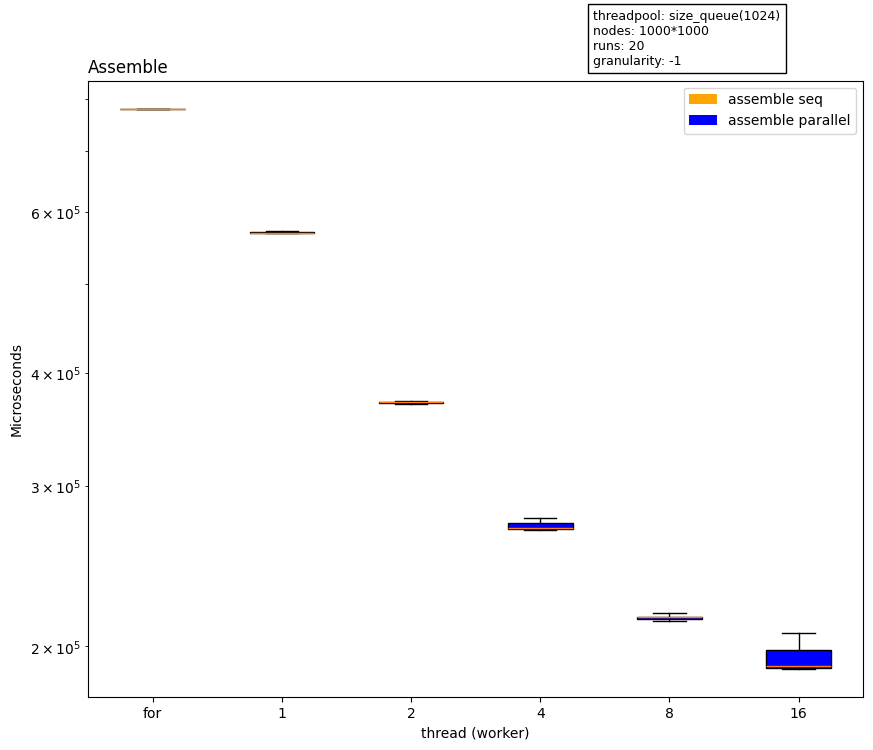

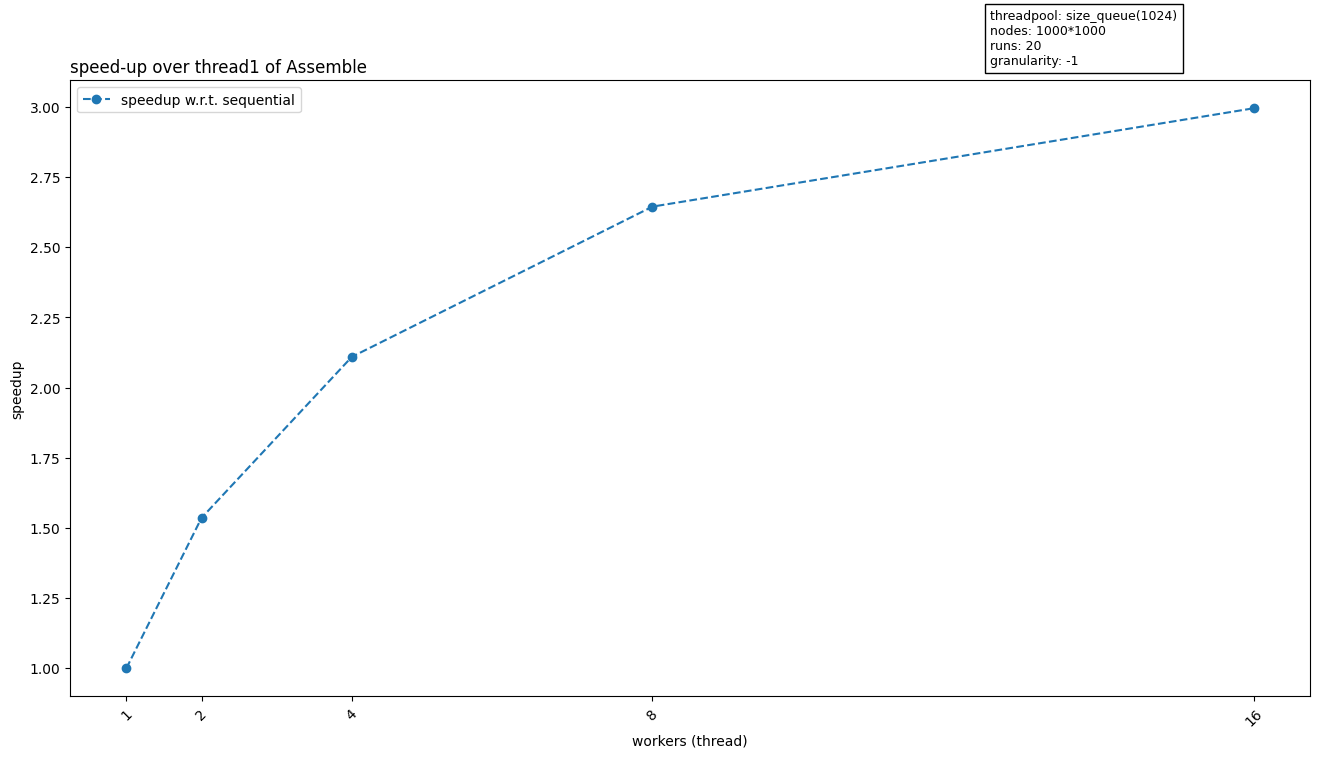

In [24]:
nodi = 1000 #500 250
plot_boxplot(assemble_nodi_1000_seq, assemble_nodi_1000_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_1000_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 194970.00
1: 146607.00
2: 87962.50
4: 68863.50
8: 56357.50
16: 47585.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.67
4 threads -> speedup: 2.13
8 threads -> speedup: 2.60
16 threads -> speedup: 3.08


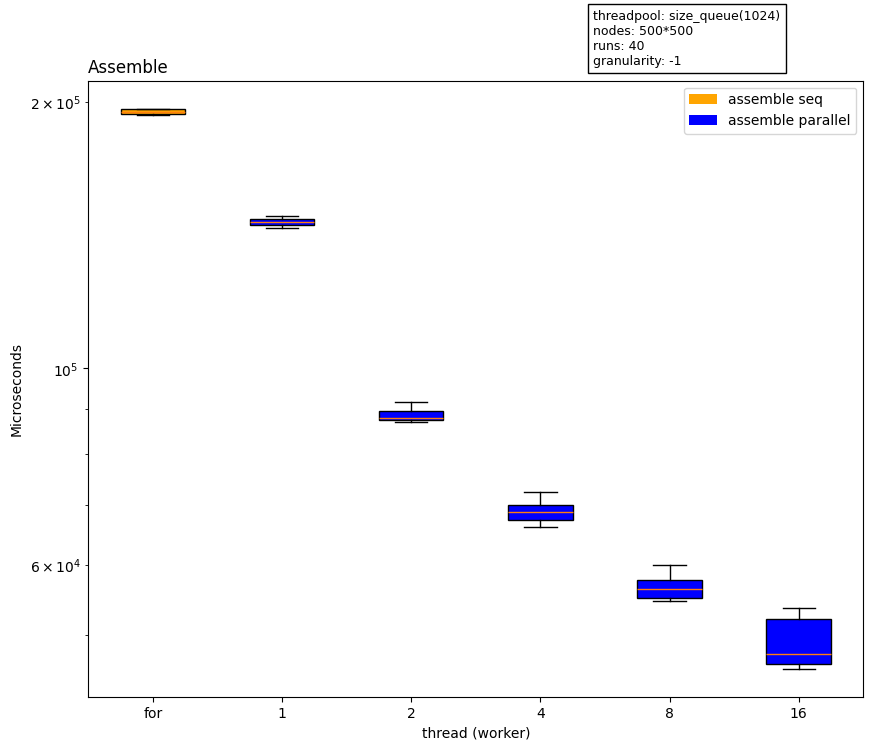

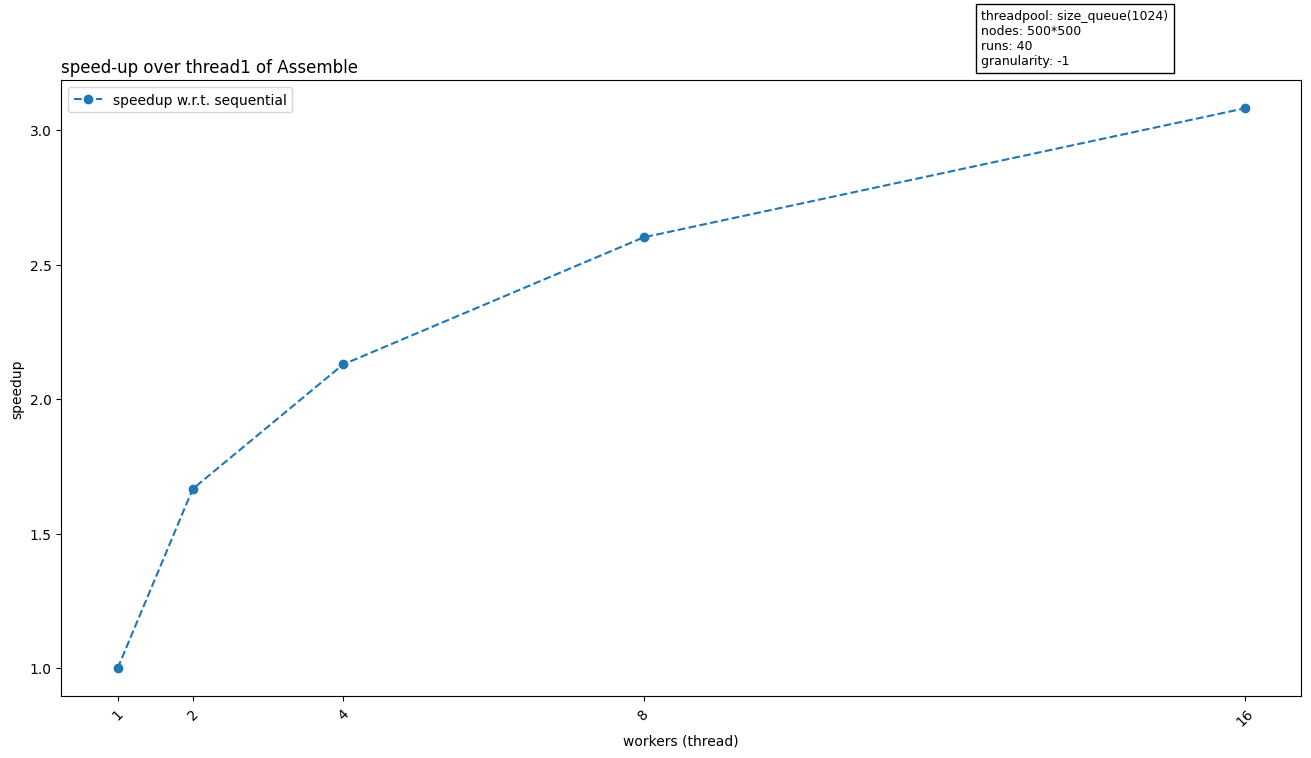

In [25]:
nodi = 500
plot_boxplot(assemble_nodi_500_seq, assemble_nodi_500_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_500_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)


=== Median values (µs) ===
for: 45670.50
1: 33879.00
2: 21144.00
4: 15513.50
8: 12326.00
16: 11205.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.60
4 threads -> speedup: 2.18
8 threads -> speedup: 2.75
16 threads -> speedup: 3.02


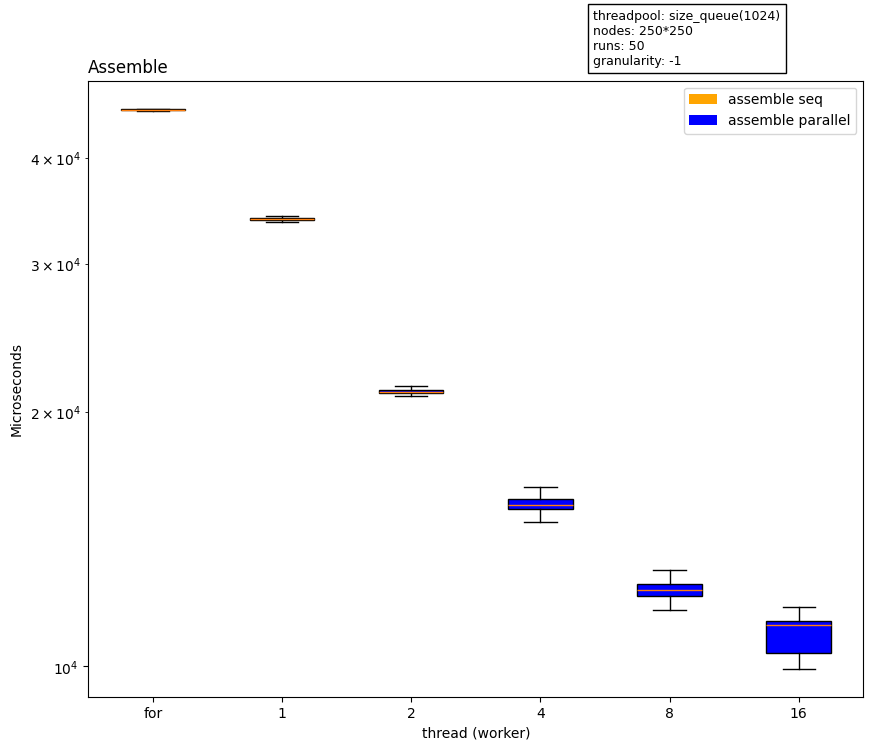

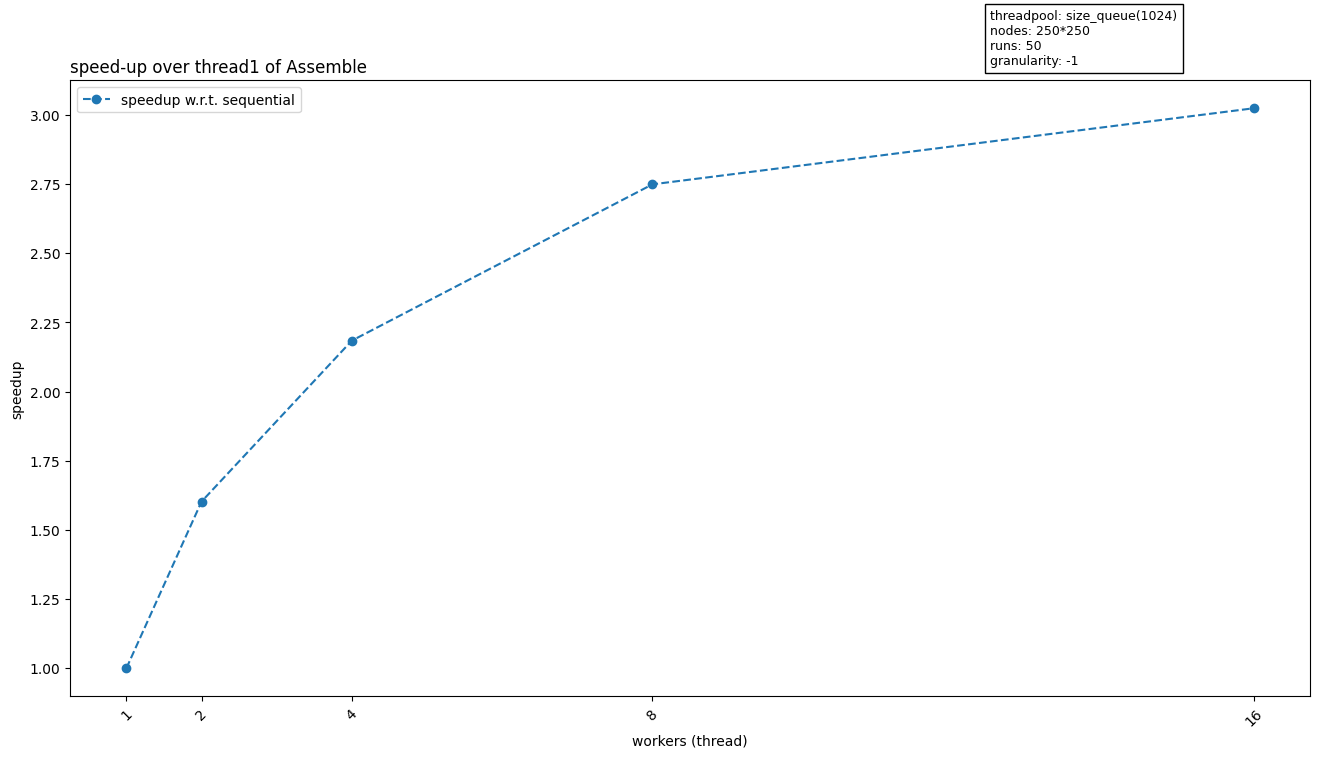

In [26]:
nodi = 250
plot_boxplot(assemble_nodi_250_seq, assemble_nodi_250_multi,"Assemble")
import copy
data_list = []
data_list.append(copy.deepcopy(assemble_nodi_250_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(assemble_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of Assemble",n_threads)

## Calcolo triple 


In [27]:
# THREAD 1
calcolo_triple_nodi_250_thread_1 = [26123,25355,25410,26582,25422,25661,25683,26598,25558,26836,25387,26638,25424,25493,25679,25684,25730,25541,25792,25484,25626,25717,25494,25557,25603,25612,25382,25371,25507,25678,25652,25657,25655,25677,25758,25846,25598,25637,25585,25707,25727,25767,25529,25690,25707,25956,25603,25547,25740,25619]
calcolo_triple_nodi_500_thread_1 = [102759,102922,102899,103244,102913,103032,102859,102961,102912,102985,102734,102849,102943,103067,103707,102783,102812,102853,103299,102947,102760,103617,102895,102735,103695,103103,103025,102901,102778,103579,102776,102718,103676,103553,102902,103153,103158,103842,102792,102939]
calcolo_triple_nodi_1000_thread_1 = [411209,408769,408760,408836,409614,411314,409439,411628,409640,410773,409312,409188,408710,408396,410014,408509,408940,410820,412986,412044]

# THREAD SEQUENZIALE
calcolo_triple_nodi_250_thread_seq = [42637,38835,38975,38857,38783,38740,38787,38838,38868,38855,38809,38762,38798,38943,38801,38746,38766,38740,38728,38843,38752,38871,38832,38709,38750,38784,38800,38781,38734,38783,38811,38771,38801,38851,38826,38810,38767,38695,38773,38949,38774,38850,38774,38840,38773,38809,38741,38790,38754,38804]
calcolo_triple_nodi_500_thread_seq = [162245,160959,160617,160991,160809,160781,160755,160942,160928,160897,160615,160910,160982,161088,160671,161068,160874,160950,160738,160850,160508,160764,160534,161059,160598,161127,160643,160925,160717,161095,160501,161044,160681,161110,160644,161082,160814,160911,160692,160797]
calcolo_triple_nodi_1000_thread_seq = [646672,645151,645878,646280,645627,645565,645258,645665,646413,645788,645704,645927,645652,645883,645931,645829,645541,645200,646040,645615]

# THREAD 2
calcolo_triple_nodi_250_thread_2 = [12924,12840,12784,13316,12924,12726,12978,12799,12762,12754,13044,12833,12734,12795,13003,12858,12950,13002,12947,12750,12951,13043,12729,13351,12743,13323,12793,12909,12764,12884,12816,13092,12718,13017,12839,13037,12923,12936,12945,12920,12732,13079,12739,12900,12927,12854,12737,13107,12728,13192]
calcolo_triple_nodi_500_thread_2 = [53054,52470,53112,52625,54824,52203,53285,52684,53405,52617,53020,52105,52740,53484,52436,52884,52778,52449,52800,53705,52521,53205,52400,52957,52765,52653,52503,52807,52535,52813,52669,52597,52651,52699,52777,52963,52383,52784,52544,52775]
calcolo_triple_nodi_1000_thread_2 = [206718,205877,205332,204921,205051,204912,205727,205581,206219,205592,205062,205052,205032,205763,205299,205142,205844,205361,205034,205540]

# THREAD 4
calcolo_triple_nodi_250_thread_4 = [7265,6757,6419,6620,6597,6444,6450,6456,6993,6416,6451,6577,6426,7002,6794,6495,6663,6574,7047,6750,6634,6595,6675,6425,6695,6977,6859,7453,6638,6497,6597,6882,6538,6503,6772,6672,6693,6640,7476,6690,6410,6709,6435,6574,6431,6489,6808,6477,6765,6491]
calcolo_triple_nodi_500_thread_4 = [26552,26529,27207,27176,27561,27548,27042,27227,26603,27831,27132,27837,26565,26655,26880,26688,26841,27368,27403,26389,27045,28046,26753,27113,27444,26474,28242,26728,27254,27250,27099,27198,26726,27299,27871,26782,26938,26360,26640,27505]
calcolo_triple_nodi_1000_thread_4 = [106632,106580,105975,105792,108521,105756,107116,105892,106895,106425,106224,105868,108712,106642,107341,106158,108451,106424,105416,105846]

# THREAD 8
calcolo_triple_nodi_250_thread_8 = [3714,3869,3811,3712,3558,3402,3399,3408,3377,3440,3608,3555,3458,3462,3543,3567,3600,3679,3379,3528,3526,3631,3640,3453,3408,3555,3594,3382,3346,3732,3559,3689,3905,3422,3570,3501,3575,3541,3397,3457,3416,3327,3638,3570,3634,3550,3316,3591,3399,3432]
calcolo_triple_nodi_500_thread_8 = [15017,14787,14995,15137,14659,15052,14691,15463,14646,14819,16907,14882,14504,14380,15045,14966,14541,15073,14990,14845,14435,14304,14466,14489,16512,15184,14759,14531,15240,14573,15337,14875,14639,15492,14858,15109,15684,17249,14567,14772]
calcolo_triple_nodi_1000_thread_8 = [52163,55716,55543,54247,55238,53734,55852,56433,52113,52554,52225,52871,52691,54751,55136,54379,53681,54579,52027,54446]

# THREAD 16
calcolo_triple_nodi_250_thread_16 = [2314,1988,2132,3252,3230,3243,3254,2201,3235,2422,3235,3226,2428,3275,3215,3230,2227,3236,3227,2067,3241,3272,2409,2068,2344,3236,3235,3247,3270,3278,2119,3297,3227,2345,2183,1926,3293,2008,3282,3252,3238,2189,3257,3465,3251,3411,1993,3241,3433,3237]
calcolo_triple_nodi_500_thread_16 = [8539,6928,13135,7580,7131,7472,7284,6939,13033,7993,7112,13163,13002,6990,6975,12931,7546,12971,7226,7797,7308,6787,6828,12862,7177,7383,13475,13145,13392,12962,7246,6915,7042,7578,12836,7130,7046,9806,6915,9058]
calcolo_triple_nodi_1000_thread_16 = [27894,27585,28152,27982,52074,52299,27472,27061,28188,51777,52181,28093,27780,27592,28517,27418,52412,28394,28282,27935]


In [28]:
# NODI 250
calcolo_triple_nodi_250_multi = [
    calcolo_triple_nodi_250_thread_1,
    calcolo_triple_nodi_250_thread_2,
    calcolo_triple_nodi_250_thread_4,
    calcolo_triple_nodi_250_thread_8,
    calcolo_triple_nodi_250_thread_16
]

# NODI 500
calcolo_triple_nodi_500_multi = [
    calcolo_triple_nodi_500_thread_1,
    calcolo_triple_nodi_500_thread_2,
    calcolo_triple_nodi_500_thread_4,
    calcolo_triple_nodi_500_thread_8,
    calcolo_triple_nodi_500_thread_16
]

# NODI 1000
calcolo_triple_nodi_1000_multi = [
    calcolo_triple_nodi_1000_thread_1,
    calcolo_triple_nodi_1000_thread_2,
    calcolo_triple_nodi_1000_thread_4,
    calcolo_triple_nodi_1000_thread_8,
    calcolo_triple_nodi_1000_thread_16
]


=== Median values (µs) ===
for: 645746.00
1: 409526.50
2: 205346.50
4: 106424.50
8: 54313.00
16: 28122.50

1 threads -> speedup: 1.00
2 threads -> speedup: 1.99
4 threads -> speedup: 3.85
8 threads -> speedup: 7.54
16 threads -> speedup: 14.56


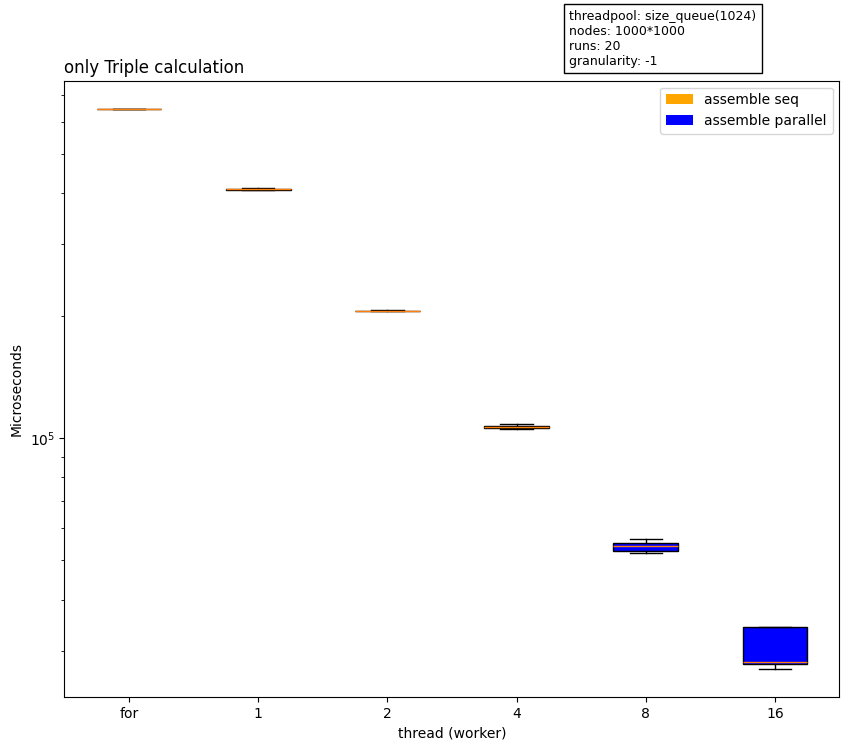

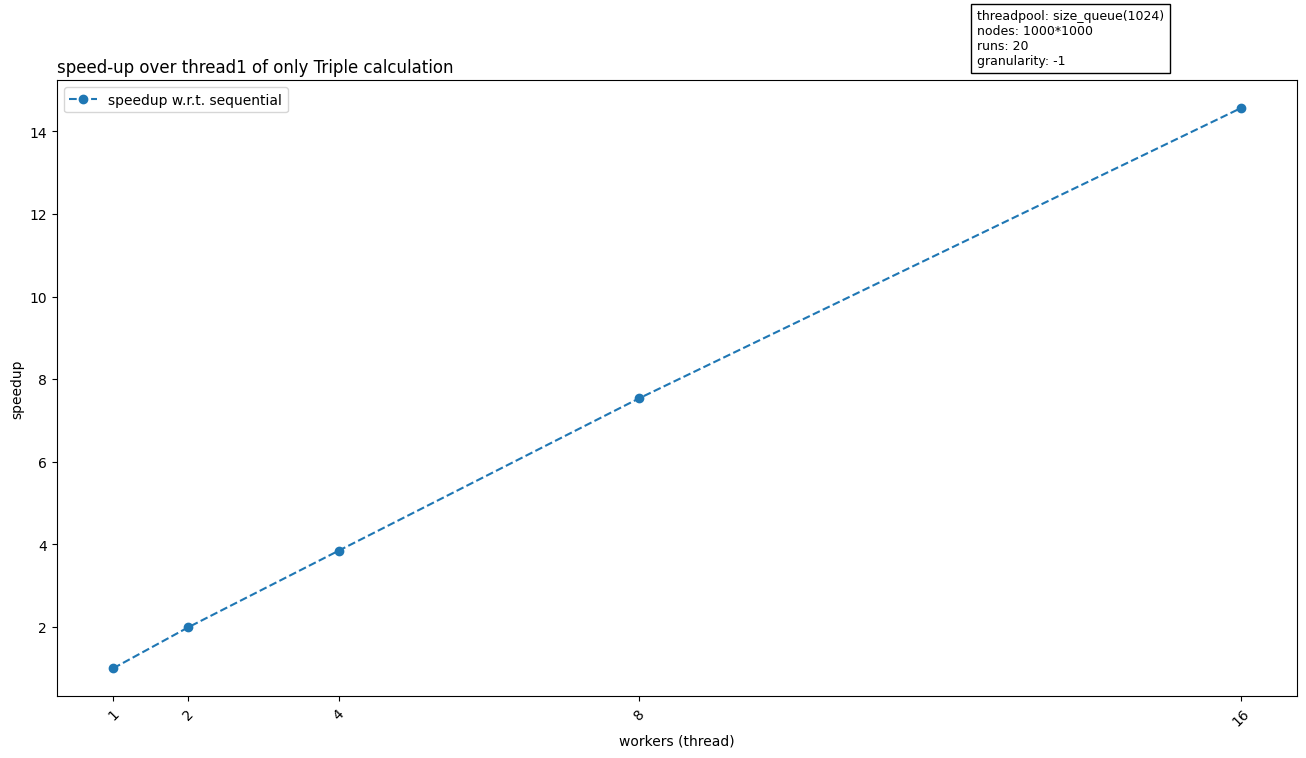

In [29]:
nodi = 1000 #500 250
plot_boxplot(calcolo_triple_nodi_1000_thread_seq, calcolo_triple_nodi_1000_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_1000_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 160862.00
1: 102930.50
2: 52752.50
4: 27106.00
8: 14866.50
16: 7509.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.95
4 threads -> speedup: 3.80
8 threads -> speedup: 6.92
16 threads -> speedup: 13.71


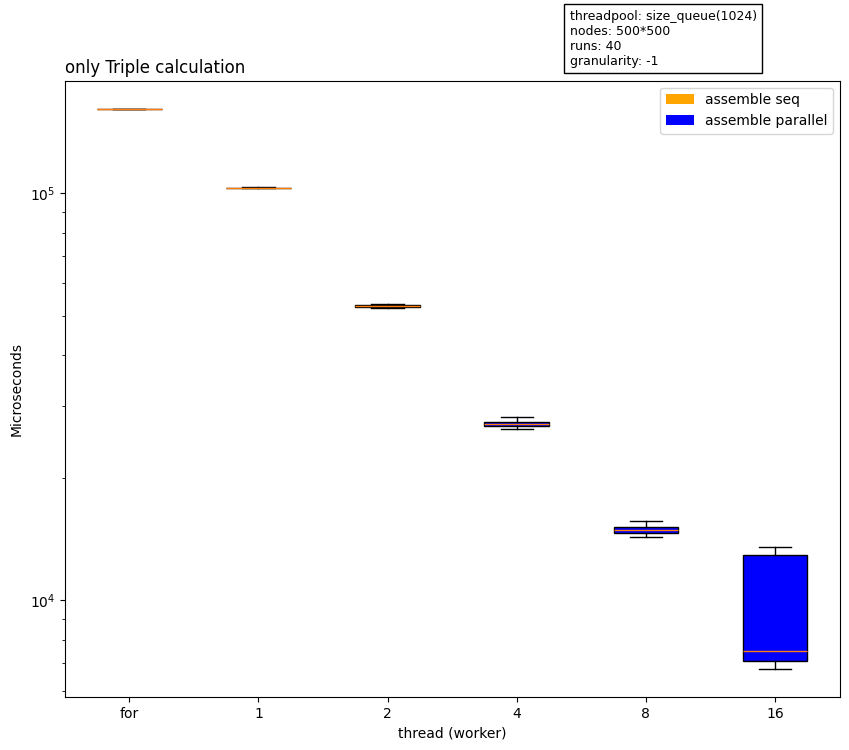

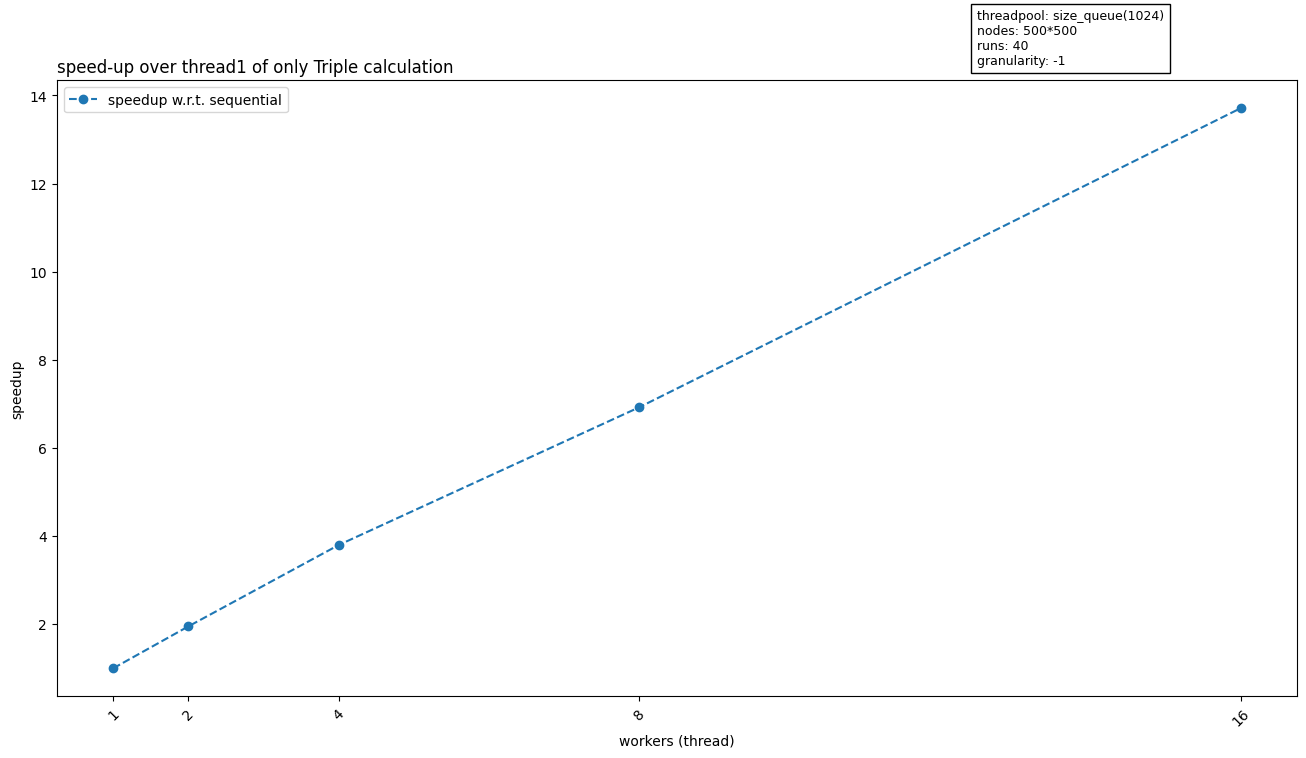

In [30]:
nodi = 500 
plot_boxplot(calcolo_triple_nodi_500_thread_seq, calcolo_triple_nodi_500_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_500_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_500_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)


=== Median values (µs) ===
for: 38794.00
1: 25653.50
2: 12904.50
4: 6627.00
8: 3546.50
16: 3235.00

1 threads -> speedup: 1.00
2 threads -> speedup: 1.99
4 threads -> speedup: 3.87
8 threads -> speedup: 7.23
16 threads -> speedup: 7.93


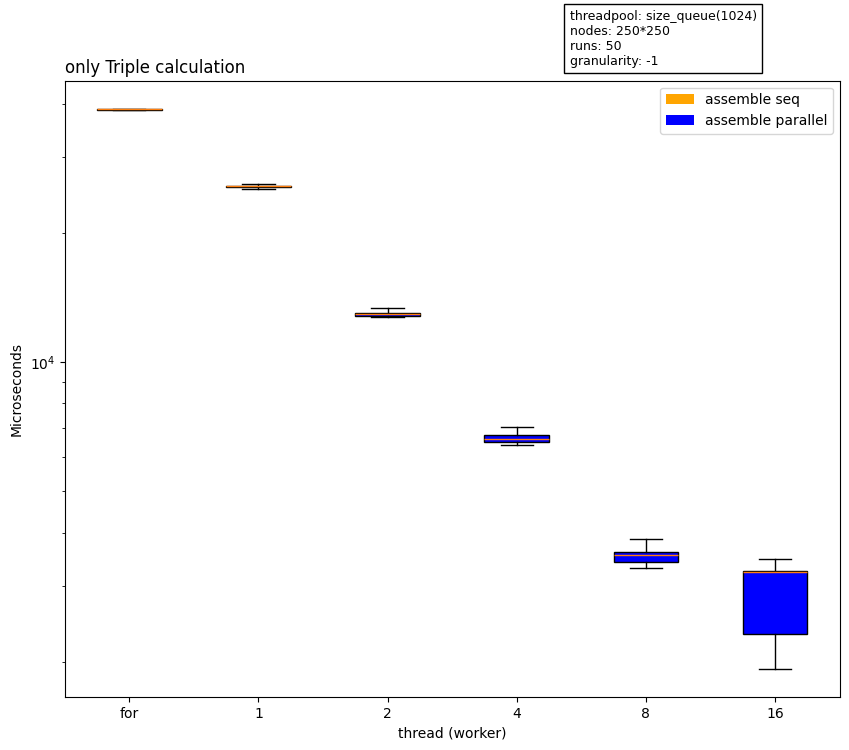

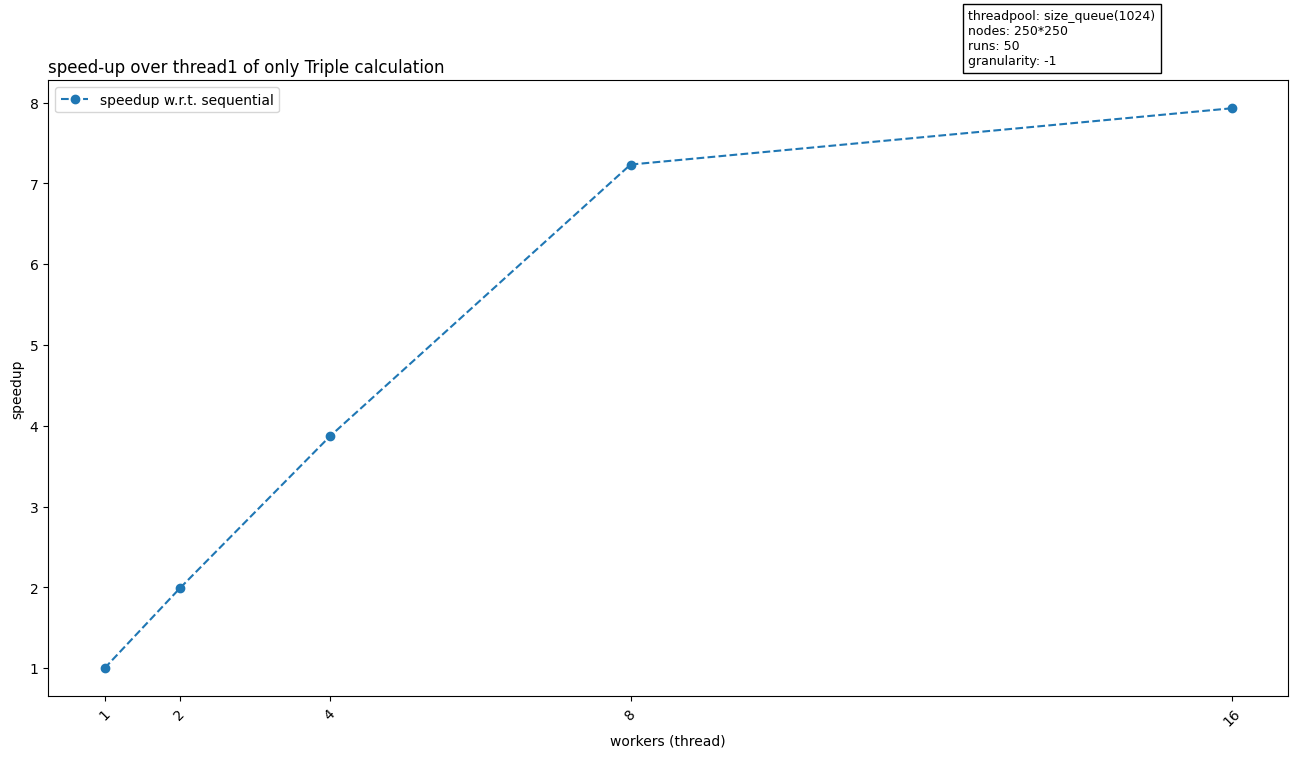

In [31]:
nodi = 250
plot_boxplot(calcolo_triple_nodi_250_thread_seq, calcolo_triple_nodi_250_multi,"only Triple calculation")
import copy
data_list = []
data_list.append(copy.deepcopy(calcolo_triple_nodi_250_thread_seq))
for i in range(len(n_threads)):
    data_list.append(copy.deepcopy(calcolo_triple_nodi_250_multi[i]))
plot_speedup(data_list,"speed-up over thread1 of only Triple calculation",n_threads)

## adamal low

In [32]:
# Mediane per nodi 250
median_calcolo_250_seq = np.median(calcolo_triple_nodi_250_thread_seq)
median_calcolo_250_th1 = np.median(calcolo_triple_nodi_250_thread_1)
median_calcolo_250_th2 = np.median(calcolo_triple_nodi_250_thread_2)
median_calcolo_250_th4 = np.median(calcolo_triple_nodi_250_thread_4)
median_calcolo_250_th8 = np.median(calcolo_triple_nodi_250_thread_8)
median_calcolo_250_th16 = np.median(calcolo_triple_nodi_250_thread_16)

# Mediane per nodi 500
median_calcolo_500_seq = np.median(calcolo_triple_nodi_500_thread_seq)
median_calcolo_500_th1 = np.median(calcolo_triple_nodi_500_thread_1)
median_calcolo_500_th2 = np.median(calcolo_triple_nodi_500_thread_2)
median_calcolo_500_th4 = np.median(calcolo_triple_nodi_500_thread_4)
median_calcolo_500_th8 = np.median(calcolo_triple_nodi_500_thread_8)
median_calcolo_500_th16 = np.median(calcolo_triple_nodi_500_thread_16)

# Mediane per nodi 1000
median_calcolo_1000_seq = np.median(calcolo_triple_nodi_1000_thread_seq)
median_calcolo_1000_th1 = np.median(calcolo_triple_nodi_1000_thread_1)
median_calcolo_1000_th2 = np.median(calcolo_triple_nodi_1000_thread_2)
median_calcolo_1000_th4 = np.median(calcolo_triple_nodi_1000_thread_4)
median_calcolo_1000_th8 = np.median(calcolo_triple_nodi_1000_thread_8)
median_calcolo_1000_th16 = np.median(calcolo_triple_nodi_1000_thread_16)


# Mediane per nodi 250
median_assemble_250_seq = np.median(assemble_nodi_250_seq)
median_assemble_250_th1 = np.median(assemble_nodi_250_thread_1)
median_assemble_250_th2 = np.median(assemble_nodi_250_thread_2)
median_assemble_250_th4 = np.median(assemble_nodi_250_thread_4)
median_assemble_250_th8 = np.median(assemble_nodi_250_thread_8)
median_assemble_250_th16 = np.median(assemble_nodi_250_thread_16)

# Mediane per nodi 500
median_assemble_500_seq = np.median(assemble_nodi_500_seq)
median_assemble_500_th1 = np.median(assemble_nodi_500_thread_1)
median_assemble_500_th2 = np.median(assemble_nodi_500_thread_2)
median_assemble_500_th4 = np.median(assemble_nodi_500_thread_4)
median_assemble_500_th8 = np.median(assemble_nodi_500_thread_8)
median_assemble_500_th16 = np.median(assemble_nodi_500_thread_16)

# Mediane per nodi 1000
median_assemble_1000_seq = np.median(assemble_nodi_1000_seq)
median_assemble_1000_th1 = np.median(assemble_nodi_1000_thread_1)
median_assemble_1000_th2 = np.median(assemble_nodi_1000_thread_2)
median_assemble_1000_th4 = np.median(assemble_nodi_1000_thread_4)
median_assemble_1000_th8 = np.median(assemble_nodi_1000_thread_8)
median_assemble_1000_th16 = np.median(assemble_nodi_1000_thread_16)




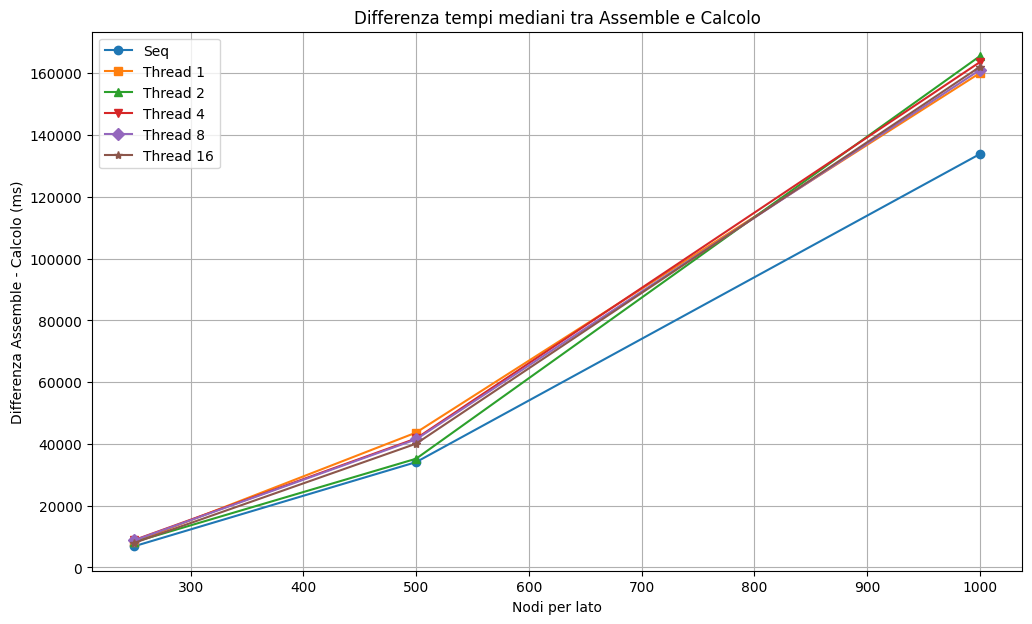

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Median values for Assemble
assemble_seq = [median_assemble_250_seq, median_assemble_500_seq, median_assemble_1000_seq]
assemble_th1 = [median_assemble_250_th1, median_assemble_500_th1, median_assemble_1000_th1]
assemble_th2 = [median_assemble_250_th2, median_assemble_500_th2, median_assemble_1000_th2]
assemble_th4 = [median_assemble_250_th4, median_assemble_500_th4, median_assemble_1000_th4]
assemble_th8 = [median_assemble_250_th8, median_assemble_500_th8, median_assemble_1000_th8]
assemble_th16 = [median_assemble_250_th16, median_assemble_500_th16, median_assemble_1000_th16]

# Median values for Calcolo
calcolo_seq = [median_calcolo_250_seq, median_calcolo_500_seq, median_calcolo_1000_seq]
calcolo_th1 = [median_calcolo_250_th1, median_calcolo_500_th1, median_calcolo_1000_th1]
calcolo_th2 = [median_calcolo_250_th2, median_calcolo_500_th2, median_calcolo_1000_th2]
calcolo_th4 = [median_calcolo_250_th4, median_calcolo_500_th4, median_calcolo_1000_th4]
calcolo_th8 = [median_calcolo_250_th8, median_calcolo_500_th8, median_calcolo_1000_th8]
calcolo_th16 = [median_calcolo_250_th16, median_calcolo_500_th16, median_calcolo_1000_th16]

# Calcolo differenze
diff_seq = np.array(assemble_seq) - np.array(calcolo_seq)
diff_th1 = np.array(assemble_th1) - np.array(calcolo_th1)
diff_th2 = np.array(assemble_th2) - np.array(calcolo_th2)
diff_th4 = np.array(assemble_th4) - np.array(calcolo_th4)
diff_th8 = np.array(assemble_th8) - np.array(calcolo_th8)
diff_th16 = np.array(assemble_th16) - np.array(calcolo_th16)

# Nodi per lato (asse x)
nodi = [250, 500, 1000]

# Plot
plt.figure(figsize=(12,7))
plt.plot(nodi, diff_seq, marker='o', label='Seq')
plt.plot(nodi, diff_th1, marker='s', label='Thread 1')
plt.plot(nodi, diff_th2, marker='^', label='Thread 2')
plt.plot(nodi, diff_th4, marker='v', label='Thread 4')
plt.plot(nodi, diff_th8, marker='D', label='Thread 8')
plt.plot(nodi, diff_th16, marker='*', label='Thread 16')
plt.xlabel("Nodi per lato")
plt.ylabel("Differenza Assemble - Calcolo (ms)")
plt.title("Differenza tempi mediani tra Assemble e Calcolo")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
for i in range(3):
    print(calcolo_seq[i]/assemble_seq[i])

0.8494323469197841
0.8250602656818998
0.8283148834643851


In [35]:
for i in range(3):
    print(calcolo_th1[i]/assemble_th1[i])

0.7572094807993152
0.7020844843697777
0.7189758724150583


In [40]:
n = 2

speedup_max = []
for i in range(3):
    p = calcolo_th1[i]/assemble_th1[i]
    s = 1-p 
    speedup_max.append(1/(s+p/n))
print(speedup_max)


[np.float64(1.6092816682302364), np.float64(1.5409323456842028), np.float64(1.5612508437062087)]


## Effetto di granularity

In [56]:
def plot_granularity(data_for, data_par_for_n,title):
    fig, ax = plt.subplots(figsize=[10, 8])
    
    boxs = []
    ticks = []
    boxs.append(data_for)
    ticks.append("for")
    for i in range(len(data_par_for_n)):
        boxs.append(data_par_for_n[i])
        ticks.append(str(granularity[i]))

    
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    ax.set(xlabel = 'iterazioni per job',ylabel = 'Microseconds')
    ax.set_title( title, loc = 'left')
    ax.set_xticks(range(1,1+len(boxs)),ticks)
    ax.set_yscale('log')

    # Colora ogni box
    colors = ['orange'] + ['blue'] * (len(bplot['boxes']) - 1)
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Crea legenda con Patch
    legend_handles = [
        Patch(facecolor='orange', label='for'),
        Patch(facecolor='blue', label='parallel_for')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.63, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes : {nodi}x{nodi}\nruns: {len(data_par_for_n[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Print delle mediane dei boxplot ---
    medians = [np.median(d) for d in boxs]
    print("\n=== Median values (µs) ===")
    for label, median in zip(ticks, medians):
        print(f"{label}: {median:.2f}")
    print("===========================\n")

In [63]:
def plot_speedup_granularity(data_list,title,gran): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    data_median = [np.median(datum) for datum in data_list]
    speedup = np.zeros(len(gran))


    for i in range(len(gran)):
        speedup[i] = data_median[0]/data_median[i+1]
        

    #print(data_list)
    #print(data_mean)
    gran = gran[::-1]
    speedup = speedup[::-1]
    ax.plot(gran,speedup,'o--')

    ax.legend(['speedup'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(gran)
    ax.set_xticklabels(gran, rotation = 45)


    ax.set(xlabel = 'graularity'+str(gran),ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: n_thread({n_thread}), size_queue({size_queue})\nnodes: {nodi}x{nodi}\nruns:{len(data_list[1])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa degli speedup ---
    print("\n=== Speedup values ===")
    for g, s in zip(gran, speedup):
        print(f"Granularity {g}: speedup = {s:.2f}")
    print("=====================\n")

In [ ]:
#parametri
nodi = 500 # tot_celle = (nodi-1)^2, granularity di partenza quindi tot_celle/n_thread
n_thread = 16
size_queue = 1024 #hardcome in codice ma qui non conta
granularity = [62250,6000,600,60] # granularity

In [72]:
dati_seq = []
dati_seq =np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+".txt",delimiter=',',dtype=int)[:-1]
dati_par = []
for i,nb in enumerate(granularity):
    dati_par.append(np.genfromtxt("test_calcolo_triple_nodi"+str(nodi)+"_thread"+str(n_thread)+"_granularity"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== Median values (µs) ===
for: 94632.00
62250: 53660.00
6000: 52081.00
600: 55985.00
60: 589855.00



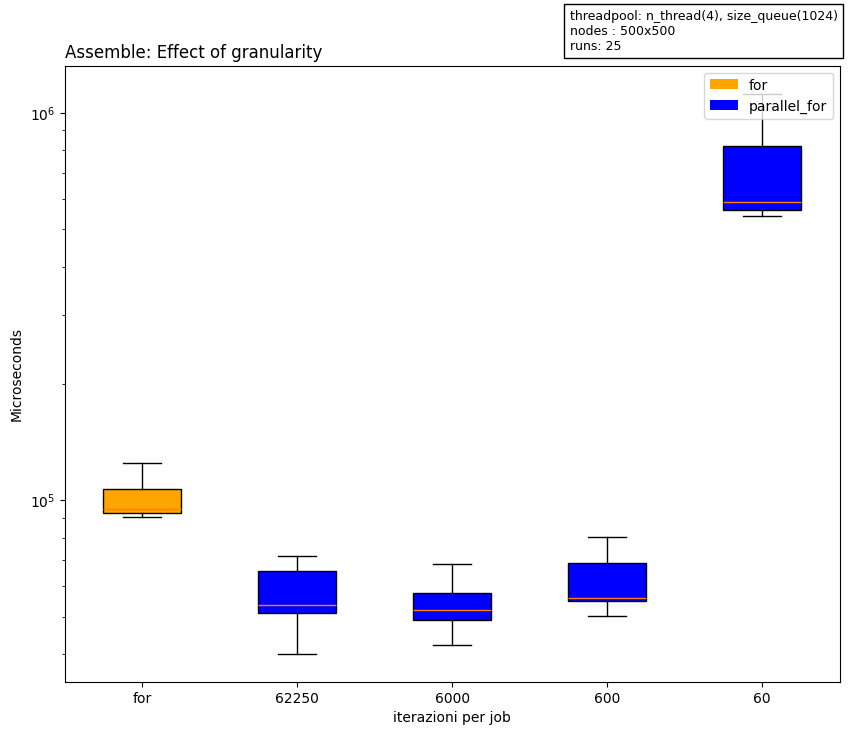

In [73]:
plot_granularity(dati_seq,dati_par,"Assemble: Effect of granularity")


=== Speedup values ===
Granularity 60: speedup = 0.16
Granularity 600: speedup = 1.69
Granularity 6000: speedup = 1.82
Granularity 62250: speedup = 1.76



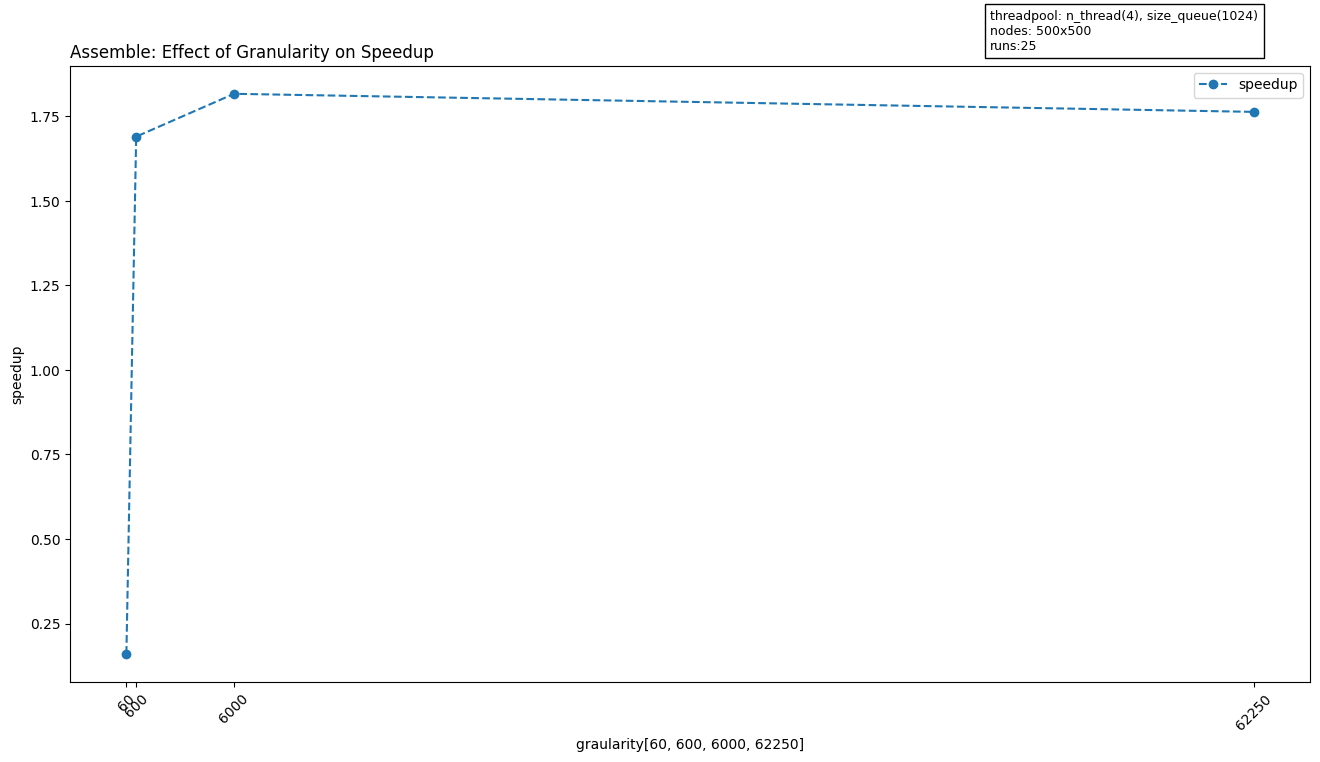

In [74]:
data_list = []
data_list.append(dati_seq)
for i,n in enumerate(granularity):
    data_list.append(dati_par[i])
plot_speedup_granularity(data_list,"Assemble: Effect of Granularity on Speedup",granularity)